Link kaggle: https://www.kaggle.com/datasets/sagnikpatra/uci-adult-census-data-dataset

| Feature               | Ghi chú                                                                 |
| --------------------- | ----------------------------------------------------------------------- |
| age                   | Tuổi                                                                    |
| workclass             | Loại công việc/việc làm, có missing values                              |
| fnlwgt                | Trọng số mẫu (sampling weight) trong khảo sát dân số                    |
| education             | Trình độ học vấn (bachelor, HS-grad, some-college, …)                   |
| education-num         | Số năm học tương ứng với education                                      |
| marital-status        | Tình trạng hôn nhân (married, divorced, never-married, …)               |
| occupation            | Nghề nghiệp, có missing values                                          |
| relationship          | Mối quan hệ trong gia đình (husband, wife, own-child, …)                |
| race                  | Chủng tộc (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other) |
| sex                   | Giới tính (Male / Female)                                               |
| capital-gain          | Lợi nhuận vốn (thu nhập ngoài lương)                                    |
| capital-loss          | Lỗ vốn                                                                  |
| hours-per-week        | Số giờ làm việc mỗi tuần                                                |
| country        | Quốc tịch / nước gốc, có missing values                                 |
| **income** *(target)* | Nhãn thu nhập (dự đoán >50K hoặc ≤50K)                                  |


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("adult_train.csv")
df.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isna().sum()/len(df)*100

Age               0.000000
Workclass         5.638647
fnlwgt            0.000000
Education         0.000000
Education_Num     0.000000
Martial_Status    0.000000
Occupation        5.660146
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_Gain      0.000000
Capital_Loss      0.000000
Hours_per_week    0.000000
Country           1.790486
Target            0.000000
dtype: float64

- Giá trị thiếu không nhiều, có thể dùng KNN Imputer
- Các cột object khá nhiều
- Các cột như Sex, Target đổi về Int để train mô hình

In [5]:
df.nunique()

Age                  73
Workclass             8
fnlwgt            21648
Education            16
Education_Num        16
Martial_Status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_per_week       94
Country              41
Target                2
dtype: int64

In [6]:
df.describe()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Age: Trung bình ~38 tuổi, đa số nằm từ 28–48 → lực lượng lao động trưởng thành là chính.
- fnlwgt: Biến trọng số, phân tán rất lớn (std cao), không dùng để phân tích trực tiếp.
- Education_Num: Trung bình 10 → tương đương tốt nghiệp cấp 3/college; đa số từ 9–12.
- Capital_Gain / Capital_Loss: Hầu hết bằng 0 (median = 0, 75% = 0) → dữ liệu rất lệch, chỉ vài người có giá trị lớn.
- Hours_per_week: Trung bình ~40h, đúng mô hình làm việc full-time; min = 1, max = 99 → có ngoại lệ.
- Target: Median = 1, mean = 0.76 → tập dữ liệu lệch mạnh, đa số thuộc lớp 1.  
=> Tổng thể: Dữ liệu bị skew mạnh ở Capital_Gain/Loss và Target, cần chú ý khi mô hình hóa.

In [7]:
def Strip(df):
    return df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

def encodeTarget(Target):
    Target=[ 0 if x == '<=50K' else 1 for x in Target ]
    return Target

def Sex(Sex):
    Sex=[1 if x=='Male' else 0 for x in Sex ]
    return Sex
df=Strip(df)
df.Target=encodeTarget(df.Target)
df.Sex=Sex(df.Sex)

In [8]:
df.Sex.unique()

array([1, 0])

In [9]:
df.Target.unique()

array([0, 1])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  int64 
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 3.7+ MB


# Visualize

In [11]:
df.Target.value_counts()

Target
0    24720
1     7841
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

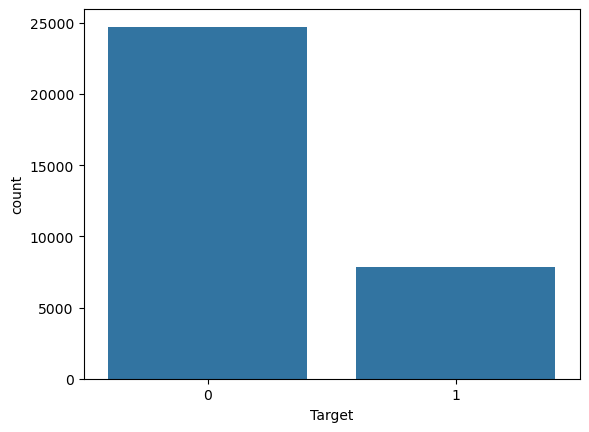

In [12]:
sns.countplot(data=df, x='Target')

- Dễ thấy đây là Imbalance Data
- Giải pháp: có thể dùng SMOTE

# Object

In [13]:
obj_cols=list(df.select_dtypes(include='object').columns)
obj_cols

['Workclass',
 'Education',
 'Martial_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Country']

<Axes: xlabel='Workclass', ylabel='count'>

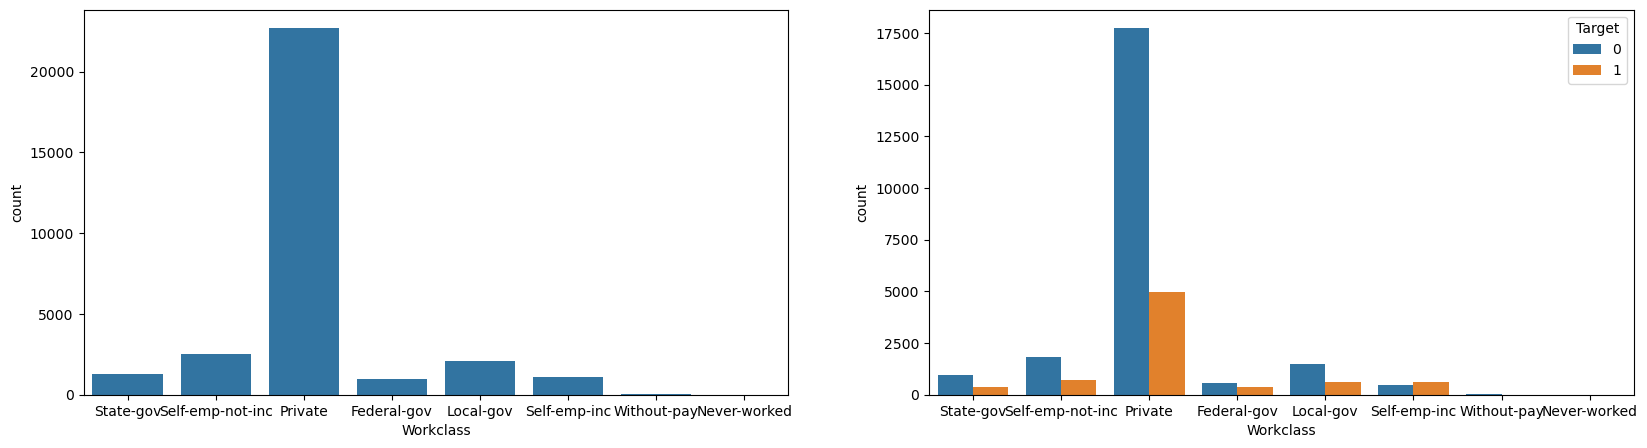

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x="Workclass", data=df, ax=ax[0])
sns.countplot(x="Workclass", data=df, hue='Target', ax=ax[1])

- Ở đây Private chiếm số lượng tổng thể rất lớn
- Giải pháp có thể là gộp các công việc khác thành others và SMOTE

<Axes: xlabel='Education', ylabel='count'>

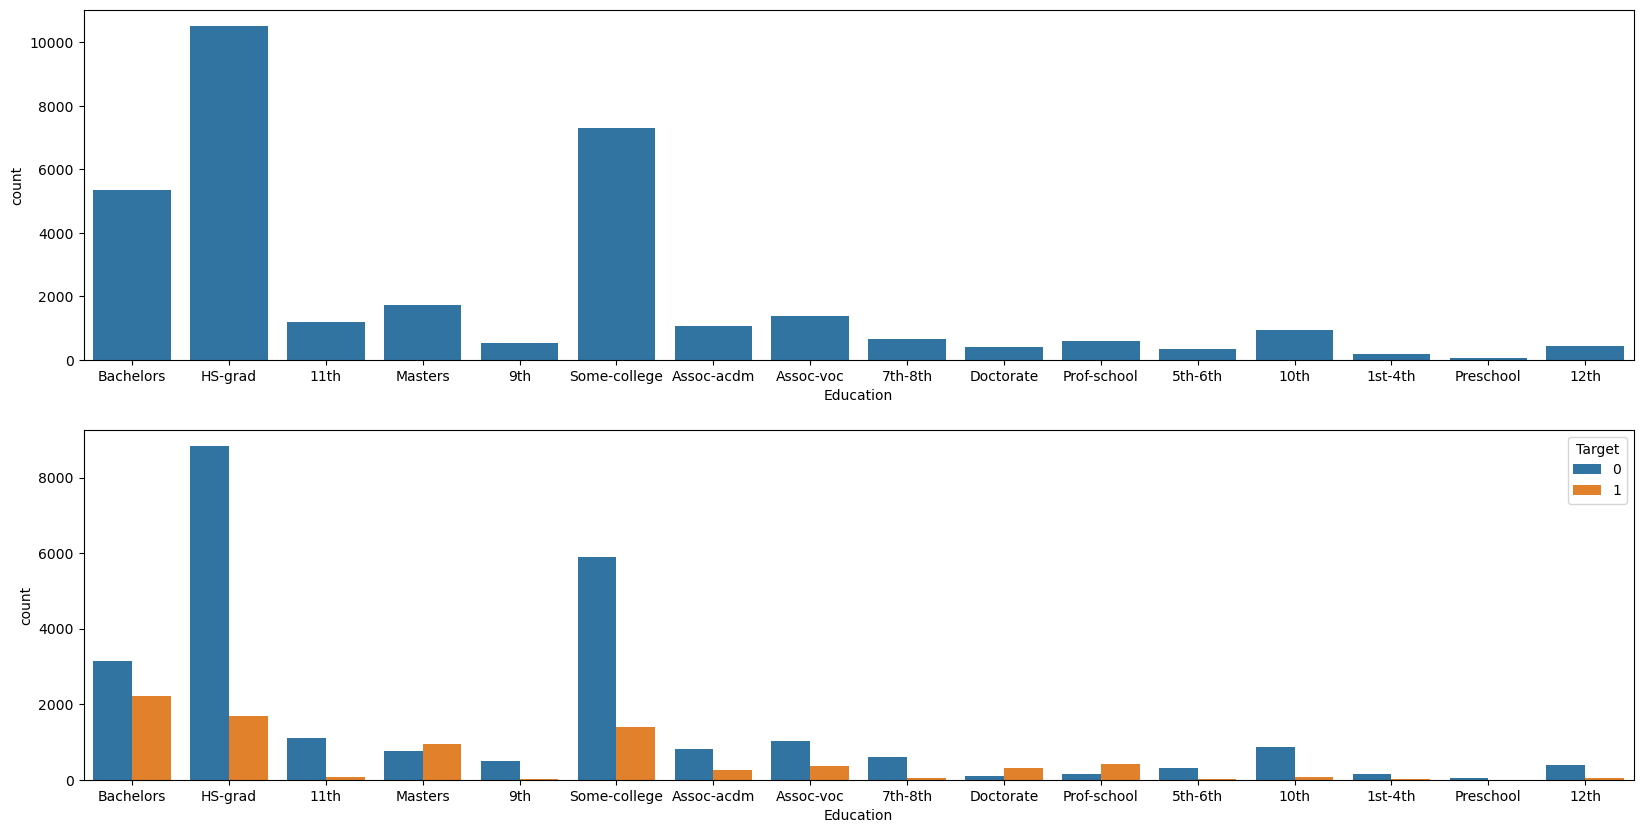

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Education',ax=ax[0])
sns.countplot(data=df, x='Education',hue='Target',ax=ax[1])

Sự khác biệt về số lượng người đạt Target 0 so với Target 1 thể hiện rõ ràng có mối liên hệ mật thiết với Trình độ Học vấn (Education).  
- Trình độ Học vấn Thấp/Trung bình (HS-grad, Some-college): Tuyệt đối có số lượng người rất đông, nhưng tỷ lệ người đạt Target 0 so với Target 1 rất thấp.
- Trình độ Học vấn Cao (Bachelors, Masters, Doctorate, Prof-school): Tuy số lượng tuyệt đối ít hơn các nhóm trên, nhưng tỷ lệ người đạt Target 0 so với Target 1 cao hơn hẳn, đặc biệt là ở nhóm Doctorate và Prof-school.

Giải pháp  
1. Feature Engineering  
- Nhóm các Cấp độ Học vấn: Gộp các cấp độ học vấn ít gặp (như 1st-4th, Preschool) vào một nhóm "Low Education" và các cấp độ cao vào một nhóm "High Education" để đơn giản hóa mô hình và cải thiện khả năng khái quát hóa.

- Nhưng đã có cột Education Num, cột này sẽ phản ánh rõ hơn về trình độ học vấn, nên sẽ xóa cột Education

<Axes: xlabel='Martial_Status', ylabel='count'>

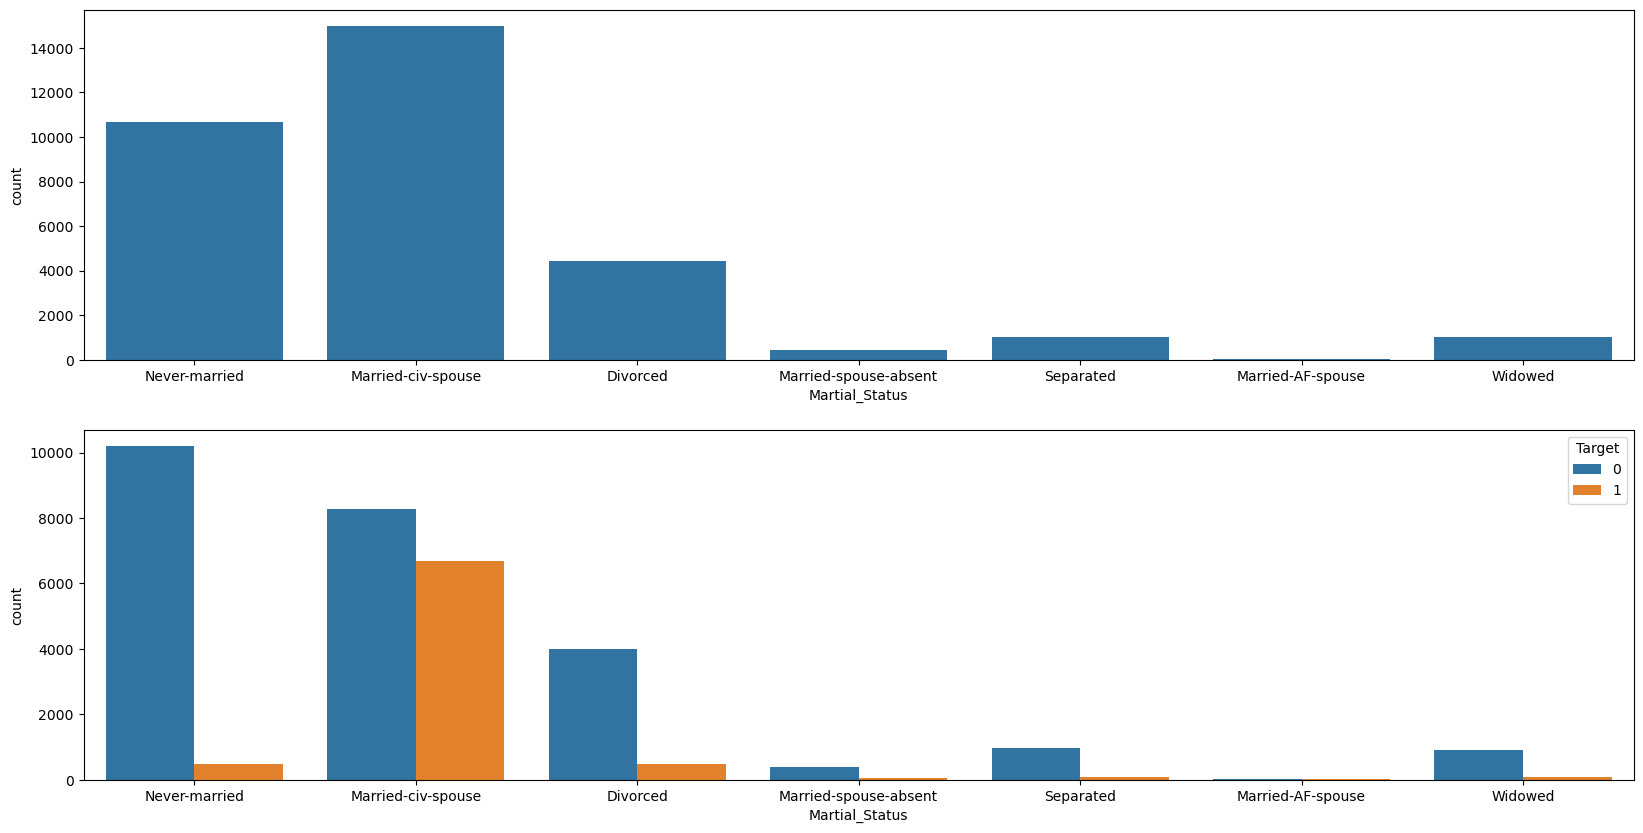

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Martial_Status',ax=ax[0])
sns.countplot(data=df, x='Martial_Status',hue='Target',ax=ax[1])

Biểu đồ Tình trạng Hôn nhân cho thấy nhóm Target 0 (màu cam) có xu hướng chiếm ưu thế hoặc ngang bằng với Target 1 ở một số tình trạng hôn nhân.
- Never-married (Chưa bao giờ kết hôn) có số lượng Target 0 vượt trội hoàn toàn so với Target 1.
- Married-civ-spouse (Đã kết hôn/Vợ chồng dân sự) có số lượng Target 0 gần bằng Target 1.
- Điều này cho thấy tình trạng chưa kết hôn hoặc đã kết hôn có mối liên hệ mạnh mẽ và khác biệt với khả năng đạt được Target 0. 

Gộp các tình trạng hôn nhân ít phổ biến (như Separated, Married-AF-spouse, Married-spouse-absent) thành một nhóm "Other" để giảm thiểu sự phân tán dữ liệu và giúp mô hình học hiệu quả hơn

<Axes: xlabel='Occupation', ylabel='count'>

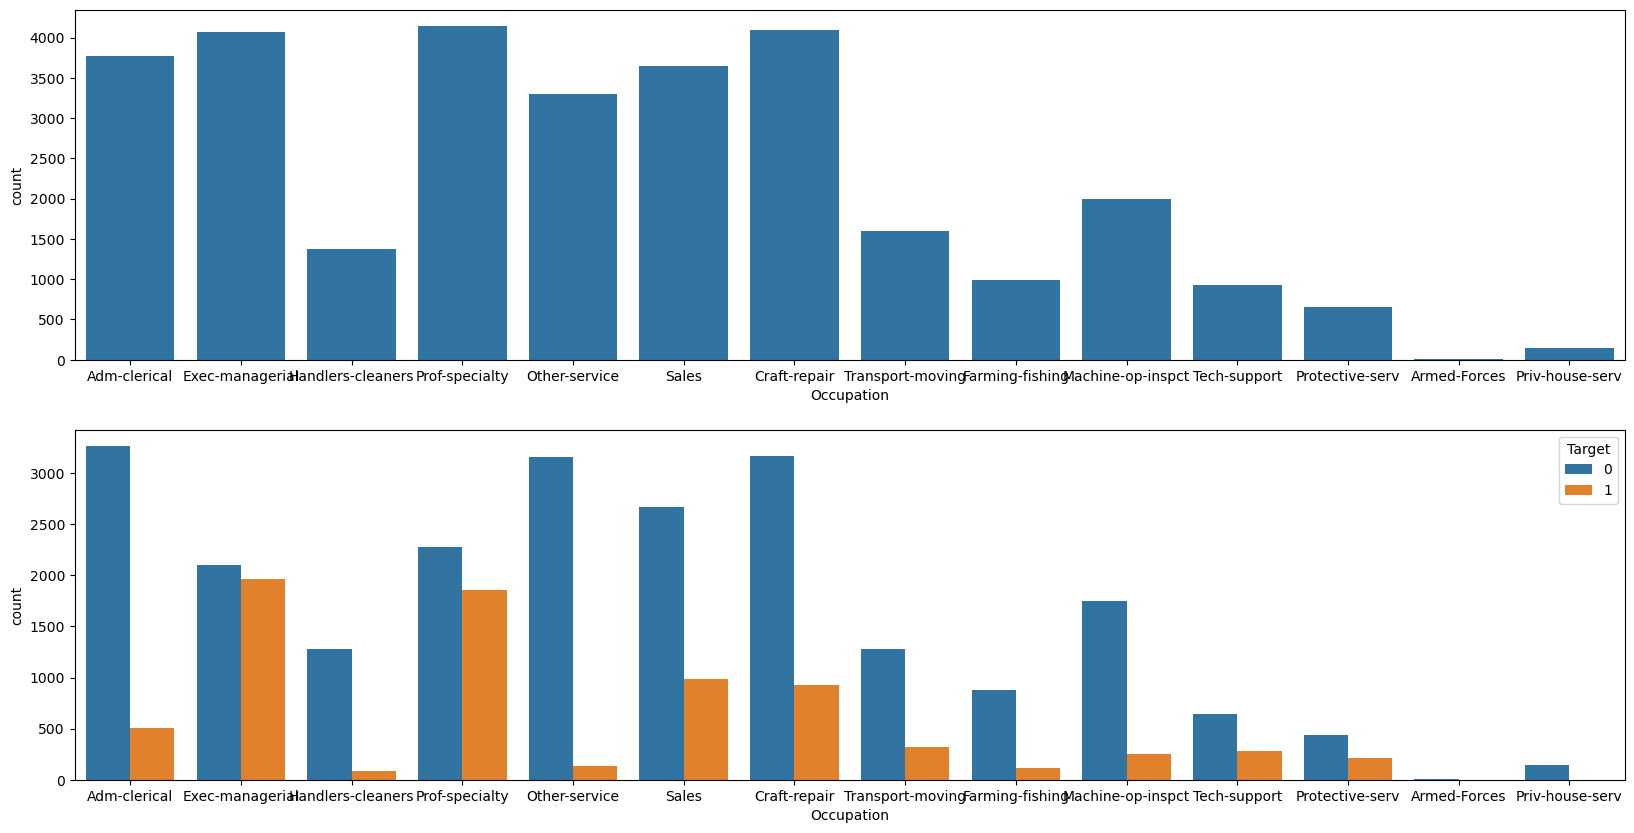

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Occupation',ax=ax[0])
sns.countplot(data=df, x='Occupation',hue='Target',ax=ax[1])

Các nghề nghiệp có Target 1 áp đảo Target 0 là Exec-managerial (Quản lý cấp cao) và Prof-specialty (Chuyên gia/Chuyên môn). Các nghề khác (như Adm-clerical, Other-service, Craft-repair) bị Target 0 áp đảo hoàn toàn.

1. Nhóm 1 Thu nhập/Giá trị Cao (High-Value Jobs)  
- Đây là các nghề nghiệp mà cột Target 1 (cam) vượt trội so với Target 0 (xanh) hoặc chiếm tỷ lệ rất cao.
- Gộp: Exec-managerial, Prof-specialty  
Đặc điểm: Đây là nhóm có khả năng đạt Target 1 cao nhất.

2. Nhóm 2 Thu nhập/Giá trị Trung bình (Mid-Value Jobs)  
- Đây là các nghề nghiệp mà cột Target 0 (xanh) áp đảo Target 1, nhưng Target 1 vẫn có số lượng đáng kể và cao hơn các nhóm thấp.
- Gộp: Sales, Craft-repair, Transport-moving, Tech-support, Protective-serv  
Đặc điểm: Tỷ lệ đạt Target 1 thấp hơn nhóm Cao nhưng cao hơn nhóm Thấp.

3. Nhóm 3 Thu nhập/Giá trị Thấp/Khác (Low/Other-Value Jobs)  
- Đây là các nghề nghiệp mà cột Target 0 (xanh) áp đảo mạnh mẽ so với Target 1 (rất ít hoặc gần như bằng 0).
- Gộp: Adm-clerical, Handlers-cleaners, Other-service, Farming-fishing, Machine-op-inspct, Armed-Forces, Priv-house-serv  
Đặc điểm: Nhóm có khả năng đạt Target 1 thấp nhất.

<Axes: xlabel='Country', ylabel='count'>

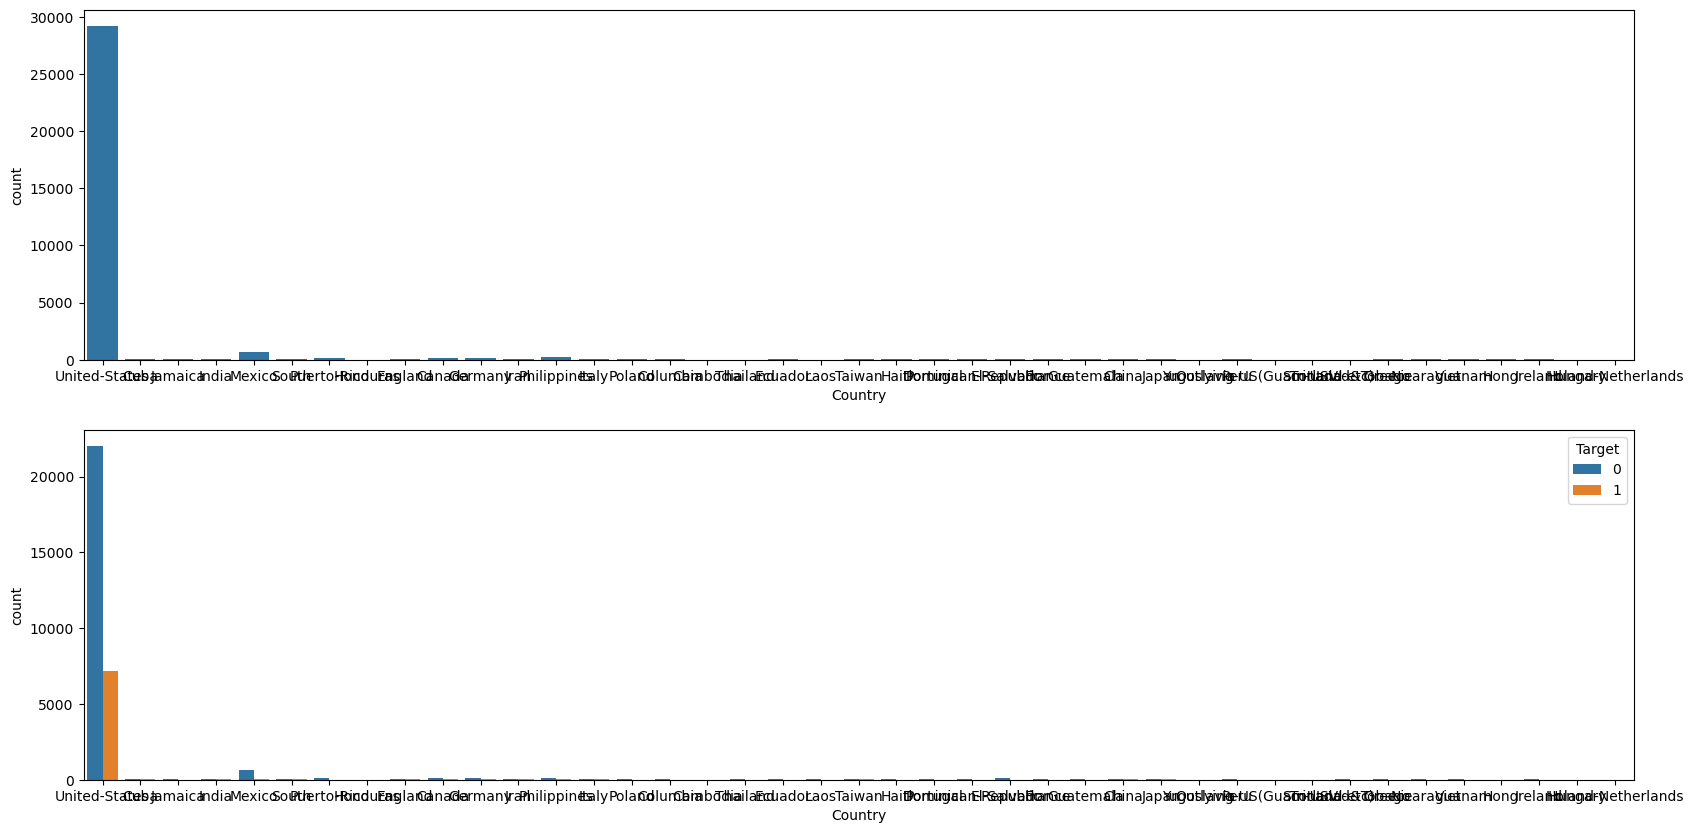

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))
sns.countplot(data=df, x='Country',ax=ax[0])
sns.countplot(data=df, x='Country',hue='Target',ax=ax[1])

In [19]:
df.Country.value_counts()

Country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece              

- Bộ dataset chỉ thu thập chủ yếu ở US, vậy nên khi train model sẽ thiên về US nhiều hơn
- Giải pháp: xóa hoặc gộp thành 2 giá trị là US và another

'Relationship',
 'Race'
 

<Axes: xlabel='Race', ylabel='count'>

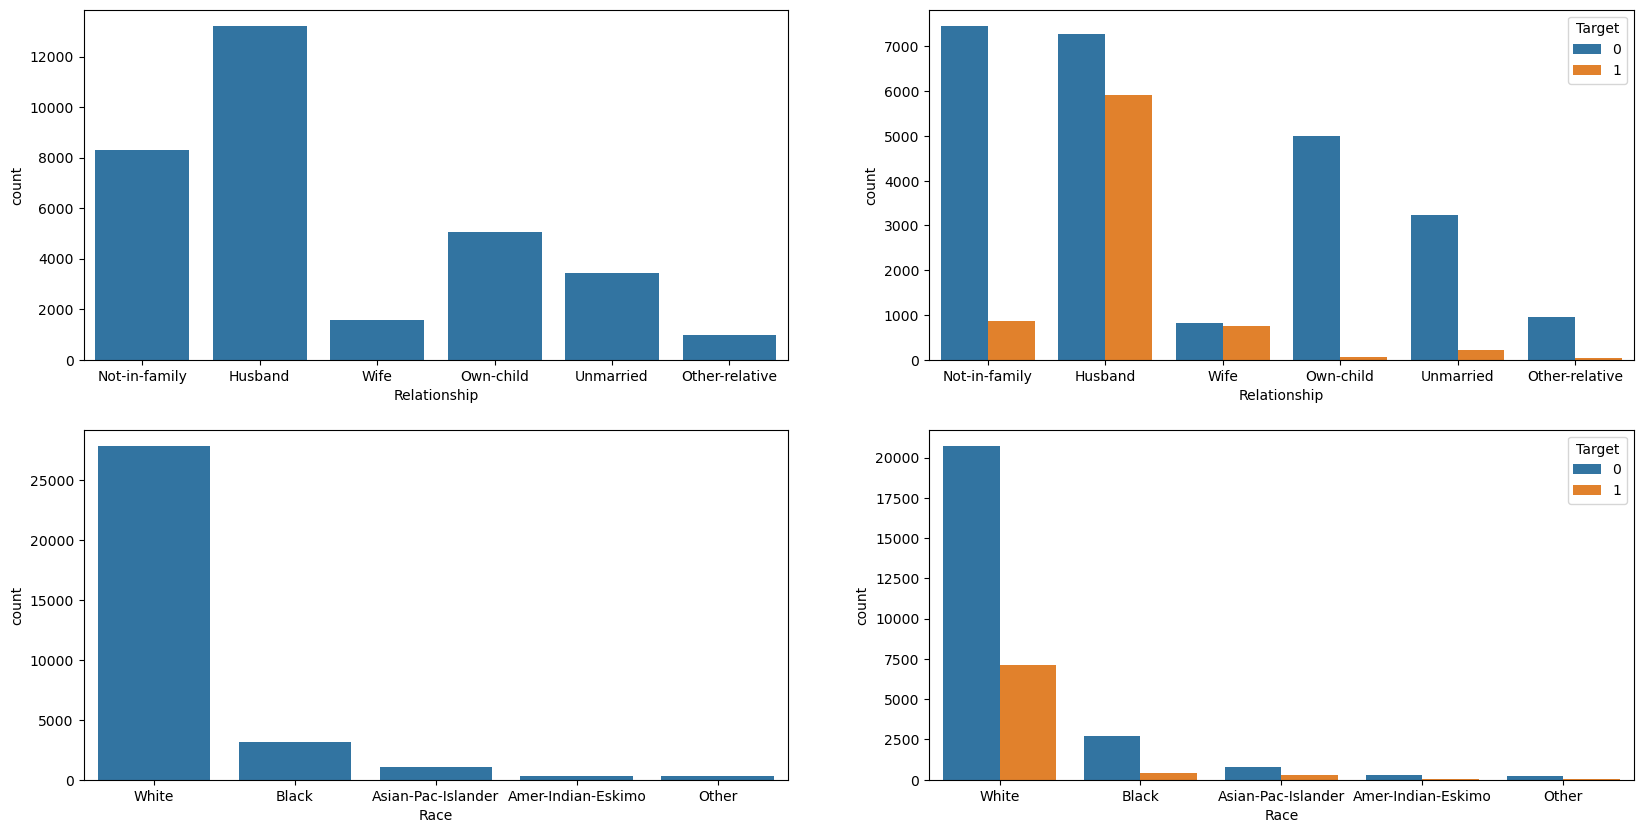

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
sns.countplot(data=df, x='Relationship',ax=ax[0,0])
sns.countplot(data=df, x='Relationship',hue='Target',ax=ax[0,1])

sns.countplot(data=df, x='Race',ax=ax[1,0])
sns.countplot(data=df, x='Race',hue='Target',ax=ax[1,1])

Relationship  
Vấn đề: Mất cân bằng, Husband và Not-in-family chiếm đa số.  
Giải pháp Gộp:  
- Nhóm Chính: Husband, Not-in-family.
- Nhóm Khác: Gộp tất cả các nhóm còn lại (Wife, Own-child, Unmarried, Other-relative) thành "Other_Relative" hoặc "Non_Head_Of_House".

Race  
Vấn đề: Mất cân bằng cực độ, White áp đảo.  
Giải pháp Gộp:
- Nhóm Chính: White
- Nhóm Khác: Gộp tất cả các nhóm thiểu số (Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other) thành "Non_White".

# Numeric

In [21]:
numeric_cols=df.drop(df.select_dtypes(include='object'),axis=1).columns
numeric_cols

Index(['Age', 'fnlwgt', 'Education_Num', 'Sex', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week', 'Target'],
      dtype='object')

In [22]:
df[list(numeric_cols)].corr()

,Age,fnlwgt,Education_Num,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Target
Age,1.000000,-0.076646,0.036527,0.088832,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.026858,0.000432,-0.010252,-0.018768,-0.009463
Education_Num,0.036527,-0.043195,1.000000,0.012280,0.122630,0.079923,0.148123,0.335154
Sex,0.088832,0.026858,0.012280,1.000000,0.048480,0.045567,0.229309,0.215980
Capital_Gain,0.077674,0.000432,0.122630,0.048480,1.000000,-0.031615,0.078409,0.223329
Capital_Loss,0.057775,-0.010252,0.079923,0.045567,-0.031615,1.000000,0.054256,0.150526
Hours_per_week,0.068756,-0.018768,0.148123,0.229309,0.078409,0.054256,1.000000,0.229689
Target,0.234037,-0.009463,0.335154,0.215980,0.223329,0.150526,0.229689,1.000000


<Axes: >

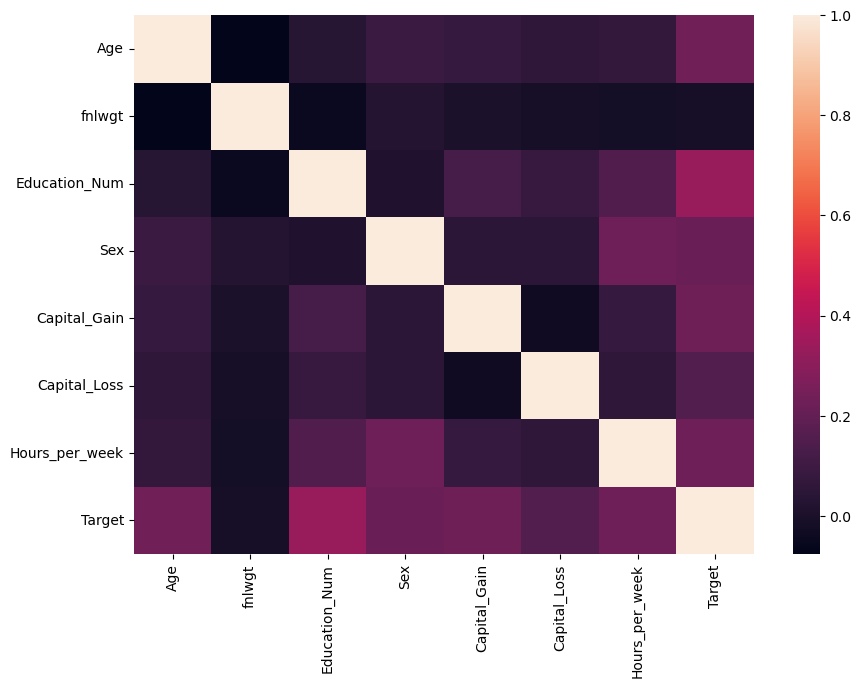

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df[list(numeric_cols)].corr())

Các biến liên quan mạnh nhất đến thu nhập (Target):  
Top mạnh → yếu:  
- Education_Num (0.335) → Trình độ học vấn càng cao → thu nhập càng cao.
- Hours_per_week (0.229) → Làm nhiều giờ hơn → thu nhập cao hơn.
- Sex (0.216) → Giới tính ảnh hưởng đến thu nhập.
- Capital_Gain (0.223) → Có nguồn lợi tức từ đầu tư → thu nhập cao hơn.
- Age (0.234) → Tuổi cao hơn → thu nhập thường cao hơn.  
Liên quan yếu / gần như không đóng góp:
- fnlwgt (≈ 0) → nên xem xét loại bỏ.

<Axes: xlabel='Capital_Gain'>

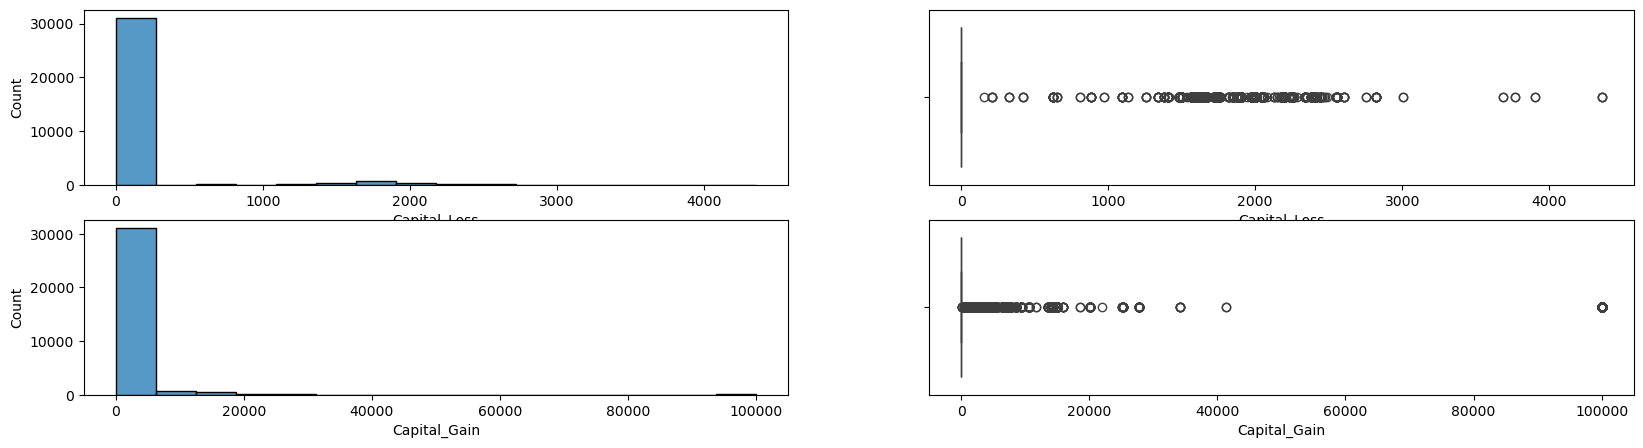

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20,5))
sns.histplot(data=df, x='Capital_Loss', ax=ax[0,0])
sns.boxplot(data=df, x='Capital_Loss', ax=ax[0,1])

sns.histplot(data=df, x='Capital_Gain', ax=ax[1,0])
sns.boxplot(data=df, x='Capital_Gain')

- 2 biến này có giá trị 0 chiếm đa số, khiến mô hình chủ yếu học từ giá trị 0 nên không có giá trị dự đoán
- Giải pháp: xóa 2 cột này

<Axes: xlabel='Education_Num'>

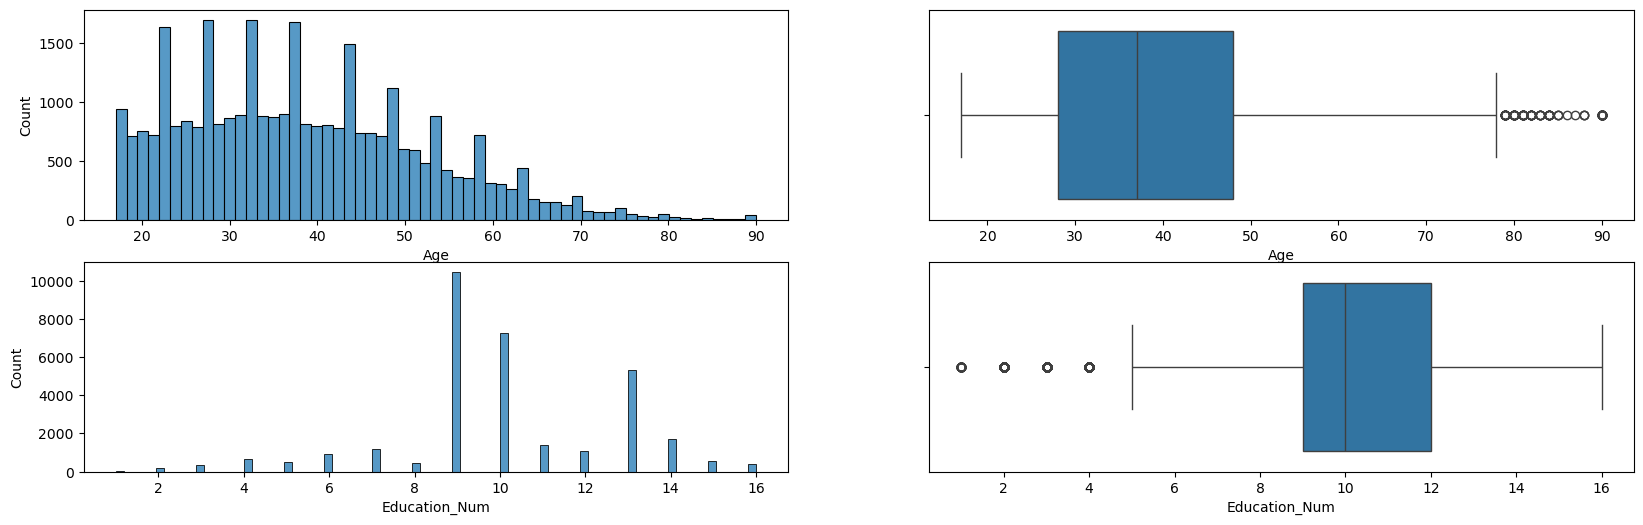

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(20,6))
sns.histplot(data=df, x='Age', ax=ax[0,0])
sns.boxplot(data=df, x='Age', ax=ax[0,1])

sns.histplot(data=df, x='Education_Num', ax=ax[1,0])
sns.boxplot(data=df, x='Education_Num')

Age  
Dữ liệu bị lệch phải nặng  
Các Outliers chủ yếu ở nhóm trên 80
Giải pháp: gộp nhóm  
- 17 - 25: Thanh niên
- 26 - 40: Người trưởng thành/Lao động chính
- 41 - 60: Trung niên
- 60: Người lớn tuổi

Education Num  
Dữ liệu ít outliers, không cần xử lý
Giải pháp gộp:  
- 1, 2, 3, 4, 5, 6, 7, 8: Cơ bản/Chưa tốt nghiệp PTTH
- 9: Tốt nghiệp PTTH (HS-grad)
- 10, 11, 12: Học nghề/Cao đẳng (Some-college/Assoc)
- 13: Cử nhân (Bachelors)
- 14, 15, 16: Sau Đại học (Masters/Doctorate)

Education num
Dữ liệu 

<Axes: xlabel='fnlwgt'>

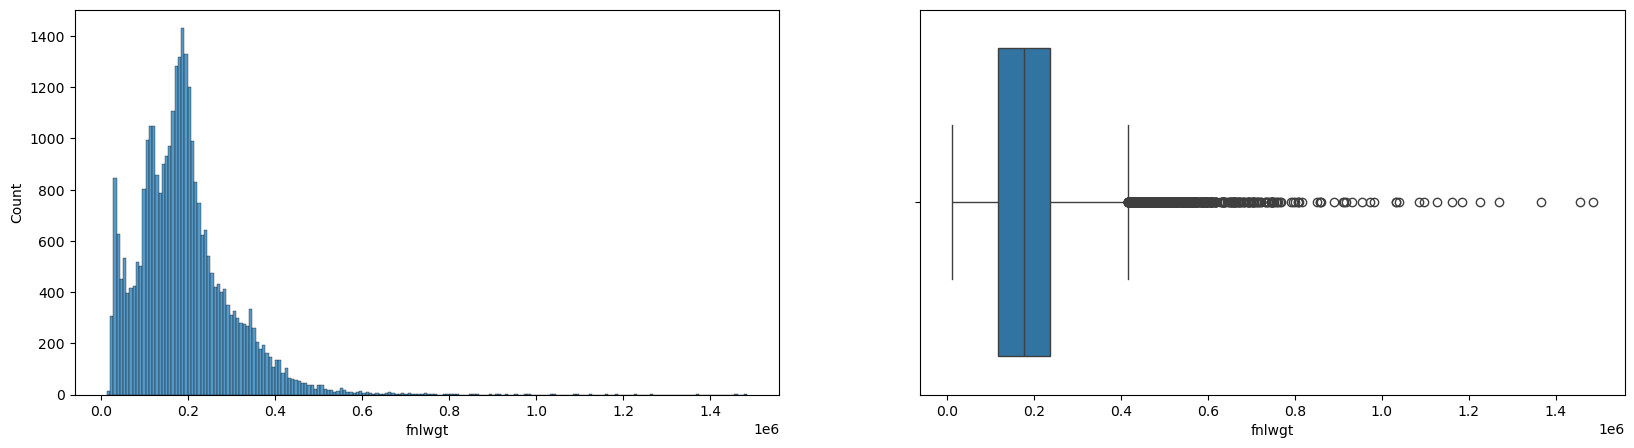

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(data=df, x='fnlwgt', ax=ax[0])
sns.boxplot(data=df, x='fnlwgt')

Dữ liệu lệch và có nhiều outliers, đồng thời corr rất thấp  
Giải pháp: xóa cột này 

<Axes: xlabel='Hours_per_week'>

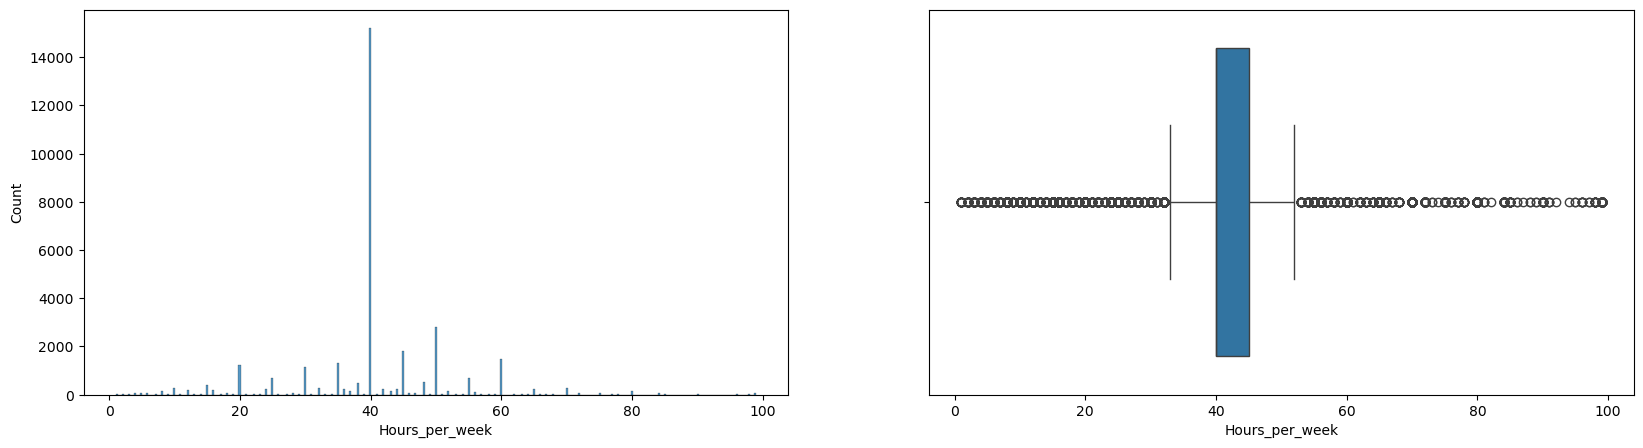

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.histplot(data=df, x='Hours_per_week', ax=ax[0])
sns.boxplot(data=df, x='Hours_per_week')

Dữ liệu phân bố không đều ở các khoảng 0-39, 40, 40-59, 60 trở đi, khiến cho Outliers trở nên nhiều hơn ở 2 đầu boxplot
Giải pháp gộp: 
- <= 39: Bán thời gian (Part-time)
- 40: Toàn thời gian Chuẩn (Standard Full-time)
- 40-59: Tăng ca/Làm thêm vừa phải (Moderate Overtime)
- 60: Làm việc Quá sức (Heavy Overtime/Excessive Hours)

# Preprocessing

## Missing values

In [28]:
def Country(Country):
    Country = ['Another' if x != 'United-States' else 'United-States' for x in Country]
    return Country

In [29]:
df.Country = Country(df.Country)
df.Country.value_counts()

Country
United-States    29170
Another           3391
Name: count, dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
def Impute(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    numeric_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

    return df

In [32]:
df=Impute(df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32561 non-null  float64
 1   Workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   Education       32561 non-null  object 
 4   Education_Num   32561 non-null  float64
 5   Martial_Status  32561 non-null  object 
 6   Occupation      32561 non-null  object 
 7   Relationship    32561 non-null  object 
 8   Race            32561 non-null  object 
 9   Sex             32561 non-null  float64
 10  Capital_Gain    32561 non-null  float64
 11  Capital_Loss    32561 non-null  float64
 12  Hours_per_week  32561 non-null  float64
 13  Country         32561 non-null  object 
 14  Target          32561 non-null  float64
dtypes: float64(8), object(7)
memory usage: 3.7+ MB


## Delete columns

In [34]:
def deleteColumns(df):
    return df.drop(['fnlwgt','Capital_Gain','Capital_Loss'],axis=1)

df=deleteColumns(df)
df.head()

,Age,Workclass,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Target
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1.0,40.0,United-States,0.0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1.0,13.0,United-States,0.0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1.0,40.0,United-States,0.0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1.0,40.0,United-States,0.0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,40.0,Another,0.0


## Binning

In [35]:


# Age → Age_Group
def bin_age(age):
    if age <= 25:
        return 'Young'
    elif age <= 40:
        return 'Adult'
    elif age <= 60:
        return 'Middle_Age'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(bin_age)

# Education_Num → Education_Level
def bin_education(num):
    if num <= 8:
        return 'Low'
    elif num == 9:
        return 'HS-grad'
    elif num <= 12:
        return 'Some-college/Assoc'
    elif num == 13:
        return 'Bachelors'
    else: 
        return 'Postgrad'

df['Education_Level'] = df['Education_Num'].apply(bin_education)

# Hours_per_week → Work_Hours_Group
def bin_hours(hour):
    if hour <= 39:
        return 'Part-time'
    elif hour == 40:
        return 'Standard Full-time'
    elif hour <= 59:
        return 'Moderate Overtime'
    else:
        return 'Excessive Hours'

df['Work_Hours_Group'] = df['Hours_per_week'].apply(bin_hours)

# Workclass → Gộp nhóm nhỏ
def bin_workclass(work):
    if work == 'Private':
        return 'Private'
    else:
        return 'Other_Workclass'

df['Workclass_Group'] = df['Workclass'].apply(bin_workclass)

# Marital_Status → Gộp nhóm
def bin_marital(status):
    if status in ['Never-married']:
        return 'Never-married'
    elif status in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']:
        return 'Married'
    else:
        return 'Other_Marital'

df['Marital_Group'] = df['Martial_Status'].apply(bin_marital)

# Occupation → Gộp nhóm theo giá trị cao / trung bình / thấp
def bin_occupation(job):
    high = ['Exec-managerial', 'Prof-specialty']
    mid = ['Sales', 'Craft-repair', 'Transport-moving', 'Tech-support', 'Protective-serv']
    low = ['Adm-clerical', 'Handlers-cleaners', 'Other-service', 'Farming-fishing', 
           'Machine-op-inspct', 'Armed-Forces', 'Priv-house-serv']
    if job in high:
        return 'High_Value_Job'
    elif job in mid:
        return 'Mid_Value_Job'
    else:
        return 'Low_Value_Job'

df['Occupation_Group'] = df['Occupation'].apply(bin_occupation)

# Relationship → Head / Other
def bin_relationship(rel):
    if rel in ['Husband', 'Not-in-family']:
        return 'Main_Relationship'
    else:
        return 'Other_Relationship'

df['Relationship_Group'] = df['Relationship'].apply(bin_relationship)

# Race → White / Non-White
df['Race_Group'] = df['Race'].apply(lambda x: 'White' if x=='White' else 'Non_White')

df.head()


,Age,Workclass,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Hours_per_week,Country,Target,Age_Group,Education_Level,Work_Hours_Group,Workclass_Group,Marital_Group,Occupation_Group,Relationship_Group,Race_Group
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1.0,40.0,United-States,0.0,Adult,Bachelors,Standard Full-time,Other_Workclass,Never-married,Low_Value_Job,Main_Relationship,White
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1.0,13.0,United-States,0.0,Middle_Age,Bachelors,Part-time,Other_Workclass,Married,High_Value_Job,Main_Relationship,White
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1.0,40.0,United-States,0.0,Adult,HS-grad,Standard Full-time,Private,Other_Marital,Low_Value_Job,Main_Relationship,White
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1.0,40.0,United-States,0.0,Middle_Age,Low,Standard Full-time,Private,Married,Low_Value_Job,Main_Relationship,Non_White
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,40.0,Another,0.0,Adult,Bachelors,Standard Full-time,Private,Married,High_Value_Job,Other_Relationship,Non_White


In [36]:
def deleteColumnsReplaced(df):
    return df.drop(['Age', 'Workclass', 'Education', 'Education_Num', 'Martial_Status',
       'Occupation', 'Relationship', 'Race', 'Hours_per_week'],axis=1)
df=deleteColumnsReplaced(df)
df.head()

,Sex,Country,Target,Age_Group,Education_Level,Work_Hours_Group,Workclass_Group,Marital_Group,Occupation_Group,Relationship_Group,Race_Group
0,1.0,United-States,0.0,Adult,Bachelors,Standard Full-time,Other_Workclass,Never-married,Low_Value_Job,Main_Relationship,White
1,1.0,United-States,0.0,Middle_Age,Bachelors,Part-time,Other_Workclass,Married,High_Value_Job,Main_Relationship,White
2,1.0,United-States,0.0,Adult,HS-grad,Standard Full-time,Private,Other_Marital,Low_Value_Job,Main_Relationship,White
3,1.0,United-States,0.0,Middle_Age,Low,Standard Full-time,Private,Married,Low_Value_Job,Main_Relationship,Non_White
4,0.0,Another,0.0,Adult,Bachelors,Standard Full-time,Private,Married,High_Value_Job,Other_Relationship,Non_White


## SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
smote = SMOTE(random_state=42)

In [39]:
x_train,y_train=df.drop('Target',axis=1), df.Target
x_train=pd.get_dummies(x_train)

In [40]:
smote = SMOTE(random_state=42)
x_train, y_train= smote.fit_resample(x_train, y_train)

In [41]:
x_train.shape

(49440, 28)

In [42]:
y_train.value_counts()

Target
0.0    24720
1.0    24720
Name: count, dtype: int64

# Train Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [44]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Dự đoán trên train (đánh giá)
y_train_pred_rf = rf.predict(x_train)
print("Random Forest Evaluation (train set):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("F1 Score:", f1_score(y_train, y_train_pred_rf))
print("Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rf))


Random Forest Evaluation (train set):
Accuracy: 0.8355784789644013
F1 Score: 0.8467238616008297
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.76      0.82     24720
         1.0       0.79      0.91      0.85     24720

    accuracy                           0.84     49440
   macro avg       0.84      0.84      0.83     49440
weighted avg       0.84      0.84      0.83     49440

Confusion Matrix:
 [[18858  5862]
 [ 2267 22453]]


In [45]:
# XGBoost
# -----------------------------
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

# Dự đoán trên train (đánh giá)
y_train_pred_xgb = xgb.predict(x_train)
print("XGBoost Evaluation (train set):")
print("Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("F1 Score:", f1_score(y_train, y_train_pred_xgb))
print("Classification Report:\n", classification_report(y_train, y_train_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_xgb))


c:\Users\Khang\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:45:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Evaluation (train set):
Accuracy: 0.8451254045307444
F1 Score: 0.8539882916038977
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.78      0.84     24720
         1.0       0.81      0.91      0.85     24720

    accuracy                           0.85     49440
   macro avg       0.85      0.85      0.84     49440
weighted avg       0.85      0.85      0.84     49440

Confusion Matrix:
 [[19391  5329]
 [ 2328 22392]]


# Test

In [46]:
df_test = pd.read_csv('adult_test.csv')
df_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [47]:
Target = [x[0] for x in df_test.Target.str.split('.')]
df_test.Target=Target
df_test.Target.unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
df_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [49]:
def preprocess_adult_test(df):
    # Strip whitespace
    df = Strip(df)
    
    # Encode Target nếu có
    if 'Target' in df.columns:
        df.Target = encodeTarget(df.Target)
    
    # Encode Sex
    if 'Sex' in df.columns:
        df.Sex = Sex(df.Sex)
    
    # Country grouping
    if 'Country' in df.columns:
        df.Country = Country(df.Country)
    
    # Impute missing values
    df = Impute(df)
    
    # Delete unnecessary columns
    df = deleteColumns(df)
    
    # Binning / grouping
    df['Age_Group'] = df['Age'].apply(bin_age)
    df['Education_Level'] = df['Education_Num'].apply(bin_education)
    df['Work_Hours_Group'] = df['Hours_per_week'].apply(bin_hours)
    df['Workclass_Group'] = df['Workclass'].apply(bin_workclass)
    df['Marital_Group'] = df['Martial_Status'].apply(bin_marital)
    df['Occupation_Group'] = df['Occupation'].apply(bin_occupation)
    df['Relationship_Group'] = df['Relationship'].apply(bin_relationship)
    df['Race_Group'] = df['Race'].apply(lambda x: 'White' if x=='White' else 'Non_White')
    
    # Drop replaced/original columns
    df = deleteColumnsReplaced(df)
    
    # One-hot encode categorical columns
    df = pd.get_dummies(df)
    
    return df


In [50]:
# Preprocess test
df_test_processed = preprocess_adult_test(df_test)

# Tách target (chỉ khi có)
if 'Target' in df_test_processed.columns:
    y_test = df_test_processed['Target']
    X_test = df_test_processed.drop('Target', axis=1)
else:
    # Nếu test không có Target
    X_test = df_test_processed
    y_test = None

# Đồng bộ cột với train
X_test = X_test.reindex(columns=x_train.columns, fill_value=0)

# Dự đoán
y_test_pred_rf = rf.predict(X_test)
y_test_pred_xgb = xgb.predict(X_test)

# Nếu có y_test, đánh giá
if y_test is not None:
    print("Random Forest Evaluation (test set):")
    print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))
    print("F1 Score:", f1_score(y_test, y_test_pred_rf))
    print("Classification Report:\n", classification_report(y_test, y_test_pred_rf, zero_division=1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))

    print("XGBoost Evaluation (test set):")
    print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
    print("F1 Score:", f1_score(y_test, y_test_pred_xgb))
    print("Classification Report:\n", classification_report(y_test, y_test_pred_xgb, zero_division=1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb))


Random Forest Evaluation (test set):
Accuracy: 0.7825686382900313
F1 Score: 0.6452905811623246
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.77      0.84     12435
         1.0       0.52      0.84      0.65      3846

    accuracy                           0.78     16281
   macro avg       0.73      0.80      0.74     16281
weighted avg       0.84      0.78      0.80     16281

Confusion Matrix:
 [[9521 2914]
 [ 626 3220]]
XGBoost Evaluation (test set):
Accuracy: 0.7944843682820466
F1 Score: 0.6498534951862704
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.79      0.85     12435
         1.0       0.54      0.81      0.65      3846

    accuracy                           0.79     16281
   macro avg       0.74      0.80      0.75     16281
weighted avg       0.84      0.79      0.81     16281

Confusion Matrix:
 [[9830 2605]
 [ 741 3105]]
